In [46]:
import monkdata as m
import dtree as d
import drawtree_qt5 as dt
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Assignment 0
- independent variables. In MONK-3 variables are basically independent of each other. MONK-1 a1=a2 creates a dependency. MONK-2 all of them are dependent
- meaningful number of attributes:
    - MONK-1: 3
    - MONK-2: 6
    - MONK-3: 3
- values that control the whole branch, like a5 = 1 (in MONK-1) or a5 = 4 (in MONK-3). The value of this attribute is enough to compute the result of that branch
- MONK-1 and MONK-3 are relatively easy to express with predicate calculus, but MONK-2 is not. This means that it is hard to model with decision trees because it is hard to express and thus we need lots of data to model it 

## Assignment 1

In [47]:
root_entropies = [d.entropy(m.monk1), d.entropy(m.monk2), d.entropy(m.monk3)]

for i in range(len(root_entropies)):
    print(f"MONK-{i+1} Entropy: {root_entropies[i]}")

MONK-1 Entropy: 1.0
MONK-2 Entropy: 0.957117428264771
MONK-3 Entropy: 0.9998061328047111


## Assignment 2
Entropy measures the level of uncertainty of something. So, in a uniform distribution, the entropy will always be maximum because all events have equal probability of happening, whereas, in non-uniform distributions, some events have more probability of happening, which is saying that the level of uncertainty is lower. For example. if you flip a coin, both outcomes have the same probability, which is 0.5. So, the entropy will be

    -0.5\*log2(0.5) -0.5\*log2(0.5) = 0.5 + 0.5 = 1

On the other hand, if you have a bag with 3 balls inside, where one of them is red and the other two are blue, then it's expectable that the probability of randomly taking out a blue ball it's higher (actually 2/3). Therefore, the level of uncertainty is lower and consequently the entropy is also lower. Here is the maths to show it:

    -0.33\*log2(0.33) -0.66\*log2(0.66) = 0.5278 + 0.3956 = 0.9234

## Assignment 3
Average gain of each attribute in each of the datasets

In [48]:
def calculate_information_gain(datasets):
    final_gains = []
    for dataset in datasets:
        tmp_gains = []
        for att in m.attributes:
            tmp_gains.append(d.averageGain(dataset, att))
        final_gains.append(tmp_gains)
    return final_gains

gains = calculate_information_gain([m.monk1, m.monk2, m.monk3])

i = 1
max_gains = []

for monk in gains:
    print(f"MONK-{i}")
    i += 1
    j = 1
    for att in monk:
        print(f"\tA{j}: {att}")
        j += 1
    max_gains.append(max(monk))
print(f"Max gains: {max_gains}")

MONK-1
	A1: 0.07527255560831925
	A2: 0.005838429962909286
	A3: 0.00470756661729721
	A4: 0.02631169650768228
	A5: 0.28703074971578435
	A6: 0.0007578557158638421
MONK-2
	A1: 0.0037561773775118823
	A2: 0.0024584986660830532
	A3: 0.0010561477158920196
	A4: 0.015664247292643818
	A5: 0.01727717693791797
	A6: 0.006247622236881467
MONK-3
	A1: 0.007120868396071844
	A2: 0.29373617350838865
	A3: 0.0008311140445336207
	A4: 0.002891817288654397
	A5: 0.25591172461972755
	A6: 0.007077026074097326
Max gains: [0.28703074971578435, 0.01727717693791797, 0.29373617350838865]


### Conclusions
- MONK-1: use A5
- MONK-2: use A5
- MONK-3: use A2


## Assignment 4
What does the entropy of the subsets look like when the information gain is maximized?

In [49]:
i = 1
for entropy, gain in zip(root_entropies, max_gains):
    print(f"MONK-{i}: {entropy-gain}")
    i += 1


MONK-1: 0.7129692502842156
MONK-2: 0.939840251326853
MONK-3: 0.7060699592963224


Entropy is the level of uncertainty. If the attribute which has the most information gain is chosen for splitting, the uncertainty of the data is decreased in the most optimal way. In practical words, that attribute contributes the most in decision making.

The information gain as a heuristic can help finding attributes which are more important than others. The equation provides a measurable value for that. This is the value the entropy can be decreased with, thus that should be maximized. After finding the most optimal candidate, a decision tree can split the data based on that attribute. This maximizes the difference of the following branches (as the information gain means exactly this - the data is separated the best possible way). This process can be recursively continued - leading to a decision tree which separates the data the best possible way at all levels starting from its root.

This process leads to an algorithm with the highest possible information gain in every level, minimizing the size of the decision tree.

But keep in mind that this is a local choice, which means that even if it is the best option locally, doesn't mean that it's the perfect option globally (it's a greedy algorithm)

## Assignment 5
Build the full decision trees and use the `check()` function to measure the performance

Split the monk1 data into subsets according to the selected attribute using
the function select (again, dened in dtree.py) and compute the information gains for the nodes on the next level of the tree. Which attributes
should be tested for these nodes?

In [50]:
# split based on the distinct values of A5 (indices from 0..5 -> A5=4)
def create_subsets(dataset, split_attr):
    subsets = []
    distinct_values = split_attr.values
    for value in distinct_values:
        subsets.append(d.select(dataset, split_attr, value))
    return subsets


split_attr = m.attributes[4]

monk1_subsets = create_subsets(m.monk1, split_attr)

cntr_subset = 1
for subset in monk1_subsets:
    print(f"Subset {cntr_subset}:")
    attr_cntr = 1
    for attribute in m.attributes:
        avg_gain = d.averageGain(subset, attribute)
        print(f"\tA{attr_cntr} gain: {avg_gain}")
        attr_cntr += 1
    cntr_subset += 1

Subset 1:
	A1 gain: 0.0
	A2 gain: 0.0
	A3 gain: 0.0
	A4 gain: 0.0
	A5 gain: 0.0
	A6 gain: 0.0
Subset 2:
	A1 gain: 0.040216841609413634
	A2 gain: 0.015063475072186083
	A3 gain: 0.03727262736015946
	A4 gain: 0.04889220262952931
	A5 gain: 0.0
	A6 gain: 0.025807284723902146
Subset 3:
	A1 gain: 0.03305510013455182
	A2 gain: 0.002197183539100922
	A3 gain: 0.017982293842278896
	A4 gain: 0.01912275517747053
	A5 gain: 0.0
	A6 gain: 0.04510853782483648
Subset 4:
	A1 gain: 0.20629074641530198
	A2 gain: 0.033898395077640586
	A3 gain: 0.025906145434984817
	A4 gain: 0.07593290844153944
	A5 gain: 0.0
	A6 gain: 0.0033239629631565126


The following attributes should be tested on the next level:
- Subset 1: nothing (as this subset already contains the same Y labels; in this subset of the problem, no matter the value of the attributes, the outcome is always TRUE)
- Subset 2: A4
- Subset 3: A6
- Subset 4: A1


For the monk1 data draw the decision tree up to the first two levels and
assign the majority class of the subsets that resulted from the two splits
to the leaf nodes. You can use the predefined function mostCommon (in
dtree.py) to obtain the majority class for a dataset.

In [51]:
subset_a4 = create_subsets(monk1_subsets[1], m.attributes[3])
print("A4 result")
for subset in subset_a4:
    print(d.mostCommon(subset))
subset_a6 = create_subsets(monk1_subsets[2], m.attributes[5])
print("A6 result")
for subset in subset_a6:
    print(d.mostCommon(subset))
subset_a1 = create_subsets(monk1_subsets[3], m.attributes[0])
print("A1 result")
for subset in subset_a1:
    print(d.mostCommon(subset))

A4 result
False
False
False
A6 result
False
False
A1 result
False
False
True


### Handmade tree
![The resulting decision tree](tree-draw.jpg)

Now using the predefined routine ID3:

In [52]:
tree = d.buildTree(m.monk1, m.attributes, 2)
# dt.drawTree(tree)

![The resulting decision tree](tree_test.png)


Build the full decision trees for all three Monk
datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and
test datasets.
For example to built a tree for monk1 and compute the performance
on the test data you could use

In [53]:
tree1 = d.buildTree(m.monk1, m.attributes)
tree2 = d.buildTree(m.monk2, m.attributes)
tree3 = d.buildTree(m.monk3, m.attributes)
'''
dt.drawTree(tree1)
dt.drawTree(tree2)
dt.drawTree(tree3)
'''

'\ndt.drawTree(tree1)\ndt.drawTree(tree2)\ndt.drawTree(tree3)\n'

### Tree 1
![The resulting decision tree](tree-monk1.png)


### Tree 2
![The resulting decision tree](tree-monk2.png)

### Tree 3
![The resulting decision tree](tree-monk3.png)

### Performance measurements

In [54]:
print(f"Tree1 traning set\t{1-d.check(tree1, m.monk1)}")
print(f"Tree1 test set\t\t{1-d.check(tree1, m.monk1test)}")
print(f"Tree2 traning set\t{1-d.check(tree2, m.monk2)}")
print(f"Tree2 test set\t\t{1-d.check(tree2, m.monk2test)}")
print(f"Tree3 traning set\t{1-d.check(tree3, m.monk3)}")
print(f"Tree3 test set\t\t{1-d.check(tree3, m.monk3test)}")

Tree1 traning set	0.0
Tree1 test set		0.17129629629629628
Tree2 traning set	0.0
Tree2 test set		0.30787037037037035
Tree3 traning set	0.0
Tree3 test set		0.05555555555555558


Based on the provided training data, the decision trees have been generated properly (training error = 0 indicates that). Based on the test set errors, it looks like MONK-2 is the dataset where our decision tree approach struggles the most:
- On MONK-1, there is ~17% error rate. With this dataset, attribute 5 produced a significant information gain (~28%) at the beginning. Based on this, this dataset looked like to be relatively efficiently solvable with our approach, which has been confirmed.
- On MONK-2, the error rate is more than 30%. This is however not a surprise, as the information gain looked like to be marginal for each attribute (maximum ~1.7%). The reason is that the relation 'exactly two' is somewhat difficult to express with predicate calculus, so it is also difficult to model. To model it properly, 432 distinct records are needed for each attribute dual combinations (because here, all needs to be properly modelled). But in this training set, there are only 169 records. 
- On MONK-3, the error rate is 5.5%, which is the best out of the three. It is worth mentioning that MONK-3's training set has an additional 5% noise. Without this, the tree would perform even better. The size of the tree suggests that the information gain was significant when slicing the data. This was somehow expected, as both A5 and A2 indicated significant information gains (~25% and ~29%) earlier, so the good performance on this dataset is not a surprise.

## Assignment 6

Pruning reduces the model complexity, since the size of the decision tree is reduced. Since decision trees often has a high variance and low bias, due to the overfitting nature of the model, the variance will thus be reduced by pruning. When variance is reduced, bias is increased. This also makes the model more general and usable.

It is notable that for 2 equally performing trees that smaller one should be chosen in order to minimize the risk of overfitting caused by variance - comparing 2 trees that perform the same, they probably have a *similar* bias, but the variance will be bigger in the bigger tree 

In [55]:
import random
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]
monk1train, monk1val = partition(m.monk1, 0.6)

## Assignment 7
Write code which performs the complete pruning by repeatedly calling
allPruned and picking the tree which gives the best classification performance on the validation dataset. You should stop pruning when all the
pruned trees perform worse than the current candidate.

In [56]:
def pruneTree(train, test, fraction):
    accuracies = {}

    train, val = partition(train, fraction)
    best_acc = 0
    prune_level = 0
    level_best_acc = 0

    # original tree
    best_tree = d.buildTree(train, m.attributes)
    level_best_acc = d.check(best_tree, val)
    best_acc = level_best_acc
    current_key = f"l{prune_level}_t0"
    accuracies[current_key] = best_acc

    # while the last level provided the best accuracy so far
    while level_best_acc == best_acc:
        level_best_acc = 0
        prune_level += 1
        pruned_trees = d.allPruned(best_tree)

        for tree_idx in range(0, len(pruned_trees)):
            current_tree = pruned_trees[tree_idx]
            current_acc = d.check(current_tree, val)
            current_key = f"l{prune_level}_t{tree_idx}"

            accuracies[current_key] = current_acc

            if(current_acc >= level_best_acc):
                level_best_acc = current_acc
                if(current_acc >= best_acc):
                    best_acc = current_acc
                    best_tree = current_tree
                    #print(f"new best tree: {best_acc}, {best_tree}")
    final_accuracy = d.check(best_tree, test)
    return final_accuracy, 1 - final_accuracy, max(accuracies.values()), max(accuracies, key=accuracies.get), accuracies

In [63]:
best_test_accuracy, error, best_acc, best_id, accs = pruneTree(m.monk1, m.monk1test, 0.6)
print(best_test_accuracy)
print(error)
print(best_acc)
print(best_id)
print(accs)

0.8611111111111112
0.13888888888888884
0.86
l0_t0
{'l0_t0': 0.86, 'l1_t0': 0.48, 'l1_t1': 0.74, 'l1_t2': 0.82, 'l1_t3': 0.82, 'l1_t4': 0.82, 'l1_t5': 0.86, 'l1_t6': 0.86, 'l1_t7': 0.84, 'l1_t8': 0.86, 'l1_t9': 0.74, 'l1_t10': 0.86, 'l1_t11': 0.8, 'l1_t12': 0.84, 'l2_t0': 0.48, 'l2_t1': 0.74, 'l2_t2': 0.82, 'l2_t3': 0.82, 'l2_t4': 0.82, 'l2_t5': 0.86, 'l2_t6': 0.86, 'l2_t7': 0.84, 'l2_t8': 0.86, 'l2_t9': 0.74, 'l2_t10': 0.8, 'l2_t11': 0.84, 'l3_t0': 0.48, 'l3_t1': 0.74, 'l3_t2': 0.82, 'l3_t3': 0.82, 'l3_t4': 0.82, 'l3_t5': 0.86, 'l3_t6': 0.86, 'l3_t7': 0.84, 'l3_t8': 0.74, 'l3_t9': 0.8, 'l3_t10': 0.84, 'l4_t0': 0.48, 'l4_t1': 0.74, 'l4_t2': 0.82, 'l4_t3': 0.82, 'l4_t4': 0.82, 'l4_t5': 0.86, 'l4_t6': 0.74, 'l4_t7': 0.8, 'l4_t8': 0.84, 'l5_t0': 0.48, 'l5_t1': 0.74, 'l5_t2': 0.82, 'l5_t3': 0.82, 'l5_t4': 0.82, 'l5_t5': 0.74, 'l5_t6': 0.8, 'l5_t7': 0.84}


In [58]:
def fractionTest(train, test, num_iters):
    mean_errors = {}
    variance = {}

    for i in np.arange(0.3, 0.89, 0.1):
        fraction = round(i, 1)
        accs = np.empty(0)
        for iteration in range(num_iters):
            best_acc, _, _, _, _ = pruneTree(train, test, fraction)
            accs = np.append(accs, best_acc)
        mean_errors[fraction] = 1-np.mean(accs)
        variance[fraction] = np.var(accs)

    return mean_errors, variance

In [59]:
def plotMeanVariance(names, means, variances):

    mean_xs = []
    mean_ys = []
    for mean in means:  # [MONK-1, MONK-3]
        mean_x, mean_y = zip(*sorted(mean.items()))
        mean_xs.append(mean_x)
        mean_ys.append(mean_y)

    variance_xs = []
    variance_ys = []
    for variance in variances:
        variance_x, variance_y = zip(*sorted(variance.items()))
        variance_xs.append(variance_x)
        variance_ys.append(variance_y)

    plt.figure(figsize=(20,5))
    # row, column, plot
    plt.subplot(1, 2, 1)
    for i in range (len(mean_ys)):
        plt.plot(mean_xs[i], mean_ys[i], marker='x')
    plt.title(f"Mean error vs fraction")
    plt.xlabel("fraction")
    plt.ylabel("mean error")
    plt.legend(names)
    plt.subplot(1, 2, 2)
    for i in range (len(variance_ys)):
        plt.plot(variance_xs[i], variance_ys[i], marker='o')
    plt.title(f"Variance vs fraction")
    plt.xlabel("fraction")
    plt.ylabel("variance")
    plt.legend(names)
    plt.show()

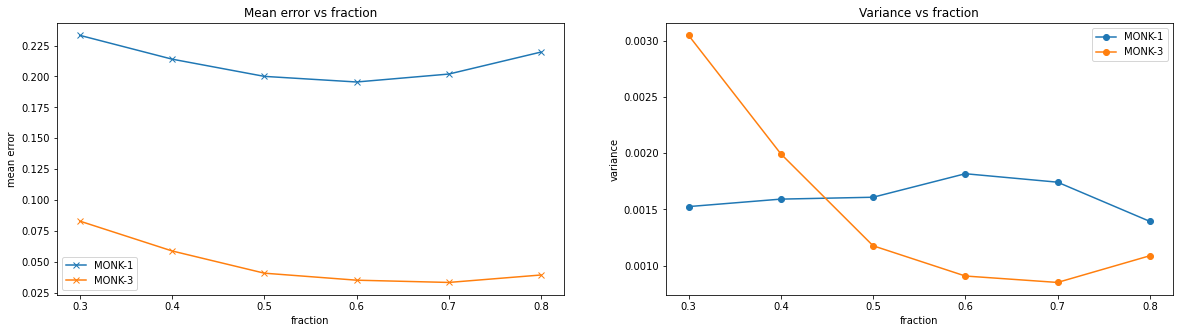

In [60]:
m1_mean, m1_variance = fractionTest(m.monk1, m.monk1test, 1000)
m3_mean, m3_variance = fractionTest(m.monk3, m.monk3test, 1000)

plotMeanVariance(["MONK-1", "MONK-3"], [m1_mean, m3_mean], [m1_variance, m3_variance])